In [18]:
import pandas as pd
import numpy as np

In [19]:
# load data
bids = pd.read_csv('C:/Users/saika/Desktop/SoarenManagemenData.csv')

In [20]:
bids.head(20)

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
0,58995330,NaN,0,-106.80,0.336
1,58995358,NaN,0,-43.12,0.219
2,58995397,NaN,0,-90.56,0.332
3,58995410,NaN,0,-82.08,0.308
4,58995635,NaN,0,94.88,0.321
5,58995654,NaN,0,19.68,0.518
6,58995685,NaN,0,-59.92,0.403
7,58995772,NaN,0,49.92,0.522
8,58995792,35.0,0,360.67,0.086
9,58995977,35.0,1,271.49,0.356


In [23]:
 bids['BidPrice'].fillna(0, inplace=True)
# resetting index 
#df.reset_index(inplace = True) 

In [25]:
bids.head(20)

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion
0,58995330,0.0,0,-106.80,0.336
1,58995358,0.0,0,-43.12,0.219
2,58995397,0.0,0,-90.56,0.332
3,58995410,0.0,0,-82.08,0.308
4,58995635,0.0,0,94.88,0.321
5,58995654,0.0,0,19.68,0.518
6,58995685,0.0,0,-59.92,0.403
7,58995772,0.0,0,49.92,0.522
8,58995792,35.0,0,360.67,0.086
9,58995977,35.0,1,271.49,0.356


In [41]:
df = bids.copy()

In [42]:
TotalRev = df.ExpectedRevenue * df.ExpectedConversion

df['TotalRev'] = TotalRev.where(df.AcceptedBid == 1, other=0)

In [43]:
df.head(20)

,id,BidPrice,AcceptedBid,ExpectedRevenue,ExpectedConversion,TotalRev
0,58995330,0.0,0,-106.80,0.336,0.00000
1,58995358,0.0,0,-43.12,0.219,0.00000
2,58995397,0.0,0,-90.56,0.332,0.00000
3,58995410,0.0,0,-82.08,0.308,0.00000
4,58995635,0.0,0,94.88,0.321,0.00000
5,58995654,0.0,0,19.68,0.518,0.00000
6,58995685,0.0,0,-59.92,0.403,0.00000
7,58995772,0.0,0,49.92,0.522,0.00000
8,58995792,35.0,0,360.67,0.086,0.00000
9,58995977,35.0,1,271.49,0.356,96.65044


In [37]:
print("Volume of leads purchased : "  + str(np.sum(df.AcceptedBid == 1)))

Volume of leads purchased : 16026


In [53]:
# Note 2 
def LeadVolume(Vol):
    if 15224 <= Vol <= 16827:
        print ("call center can handle these leads")
    else : 
        print ("Volume of leads exceeded, call center cannot handle these leads")



In [54]:
Vol = np.sum(df.AcceptedBid == 1) # Note 2
LeadVolume(Vol)

call center can handle these leads


In [44]:
NetRev = df.TotalRev - df.BidPrice

df['NetRev'] = NetRev.where(df.AcceptedBid == 1, other=0)

In [45]:
Sum = np.sum(df.NetRev)

In [48]:
#Sanity Check
print("Net revenue for the file for the bids that are accepted : " + str (np.sum(df.NetRev)))

Net revenue for the file for the bids that are accepted : 1207654.0432900002


In [ ]:
# Using Simple Model
def SimpleModel (x, y): # x - Expected revenue, y - Expected conversion rate, bid - bid price. 
    if x*y > 100:
        bid =75
    elif x*y > 75:
        bid=50
    elif x*y > 50:
        bid = 35
    elif x*y > 20 :
        bid =3
    else:
        bid = 0
    return bid 

In [56]:
# Considering only two columns

df['bidCal'] = df.apply(lambda row: SimpleModel(row['ExpectedRevenue'], row['ExpectedConversion']), axis=1)

In [60]:
match = len(df['bidCal']==df['BidPrice'])

In [61]:
totalVal= len(df)

In [63]:
print('Accuracy using simple Model is : ' + str(match*100/totalVal))

Accuracy using simple Model is : 100.0


In [71]:
df.groupby(['BidPrice'])['NetRev'].sum()

BidPrice
0.0          0.00000
3.0      35952.39241
35.0    450096.18723
50.0     49774.68369
75.0    671830.77996
Name: NetRev, dtype: float64

In [81]:
df2 = df.groupby(['BidPrice'], as_index = False).agg({'NetRev':'sum'})
            

print (df2)

   BidPrice        NetRev
0       0.0       0.00000
1       3.0   35952.39241
2      35.0  450096.18723
3      50.0   49774.68369
4      75.0  671830.77996


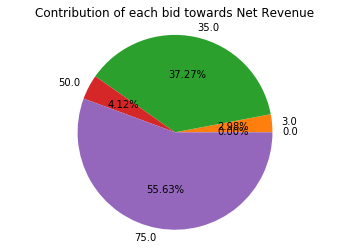

In [82]:
import matplotlib.pyplot as plt
plt.pie(df2['NetRev'], labels=df2['BidPrice'], autopct='%0.2f%%', shadow=False)
plt.axis('equal')
from matplotlib import rcParams
plt.title('Contribution of each bid towards Net Revenue')
rcParams['axes.titlepad'] = 30
plt.show()

# Machine Learning

In [83]:
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [118]:
y1  = df['BidPrice'].astype('category')

In [119]:
x = df[['ExpectedRevenue', 'AcceptedBid', 'ExpectedConversion']]

In [120]:
print(y1)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
53945     0.0
53946    75.0
53947     0.0
53948     0.0
53949     0.0
Name: BidPrice, Length: 53950, dtype: category
Categories (5, float64): [0.0, 3.0, 35.0, 50.0, 75.0]


In [121]:
x.head()

,ExpectedRevenue,AcceptedBid,ExpectedConversion
0,-106.80,0,0.336
1,-43.12,0,0.219
2,-90.56,0,0.332
3,-82.08,0,0.308
4,94.88,0,0.321


In [122]:
Scoring = 'neg_mean_squared_error'
num_folds =10
seed =7

In [123]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y1, test_size = 0.2
                                                    ,random_state = 0)
print (Xtrain.shape, Ytrain.shape)
print (Xtest.shape, Ytest.shape)

(43160, 3) (43160,)
(10790, 3) (10790,)


In [124]:
# Spot Check Algorithms
algos = []
algos.append(('LR', LinearRegression()))
algos.append(('LASSO', Lasso()))
algos.append(('EN', ElasticNet()))
algos.append(('KNN', KNeighborsRegressor()))
algos.append(('CART', DecisionTreeRegressor()))
algos.append(('SVR', SVR()))

In [125]:
# evaluate each model in turn
out = []
Names = []
for Name, algo in algos:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(algo, Xtrain, Ytrain, cv=kfold, scoring=Scoring)
	out.append(cv_results)
	Names.append(Name)
	Msg = "%s: %f (%f)" % (Name, cv_results.mean(), cv_results.std())
	print(Msg)

C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -95.330506 (3.924091)
LASSO: -113.258998 (4.128357)
EN: -131.272910 (4.327601)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -72.643917 (4.866427)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: -89.089742 (6.582132)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR: -111.868294 (5.460349)


In [127]:
# Standardize the dataset
Pipelines = []
Pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
Pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
Pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
Pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
Pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
Pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
out = []
Names = []
for Name, algos in Pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(algos, Xtrain, Ytrain, cv=kfold, scoring=Scoring)
	out.append(cv_results)
	Names.append(Name)
	msg = "%s: %f (%f)" % (Name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -95.330506 (3.924091)
ScaledLASSO: -97.586693 (4.212281)
EN: -132.418304 (5.517964)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -52.619854 (3.027024)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: -89.194787 (6.258591)


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR: -65.905860 (5.063589)


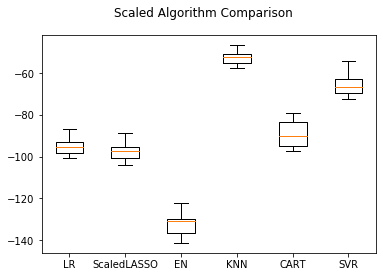

In [129]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(out)
ax.set_xticklabels(Names)
plt.show()